In [1]:
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download latest version
path = kagglehub.dataset_download("mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Nick\.cache\kagglehub\datasets\mauryansshivam\netflix-ott-revenue-and-subscribers-csv-file\versions\3


In [3]:
df = pd.read_csv('C:/Users/Nick/.cache/kagglehub/datasets/mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file/versions/3/netflix_revenue_updated.csv')

In [4]:
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


In [5]:
print(df.columns.tolist())

['Date', 'Global Revenue', 'UCAN Streaming Revenue', 'EMEA Streaming Revenue', 'LATM Streaming Revenue', 'APAC Streaming Revenue', 'UCAN Members', 'EMEA  Members', 'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU', 'APAC  ARPU', 'Netflix Streaming Memberships ']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            21 non-null     object 
 1   Global Revenue                  21 non-null     int64  
 2   UCAN Streaming Revenue          21 non-null     int64  
 3   EMEA Streaming Revenue          21 non-null     int64  
 4   LATM Streaming Revenue          21 non-null     int64  
 5   APAC Streaming Revenue          21 non-null     int64  
 6   UCAN Members                    21 non-null     int64  
 7   EMEA  Members                   21 non-null     int64  
 8   LATM Members                    21 non-null     int64  
 9   APAC Members                    21 non-null     int64  
 10  UCAN ARPU                       21 non-null     float64
 11  EMEA ARPU                       21 non-null     float64
 12  LATM  ARPU                      21 non

In [7]:
#count nulls
null_counts = df.isnull().sum()
print(null_counts)

Date                              0
Global Revenue                    0
UCAN Streaming Revenue            0
EMEA Streaming Revenue            0
LATM Streaming Revenue            0
APAC Streaming Revenue            0
UCAN Members                      0
EMEA  Members                     0
LATM Members                      0
APAC Members                      0
UCAN ARPU                         0
EMEA ARPU                         0
LATM  ARPU                        0
APAC  ARPU                        0
Netflix Streaming Memberships     0
dtype: int64


In [8]:
#Lets get a quick summary of our data and make it readable
summary = df.describe()
formatted_summary = summary.map(lambda x: f"{x:,.2f}")
print(formatted_summary)

         Global Revenue UCAN Streaming Revenue EMEA Streaming Revenue  \
count             21.00                  21.00                  21.00   
mean   7,121,887,333.33       3,205,984,714.29       2,203,561,571.43   
std    1,351,591,300.34         488,711,064.83         496,543,770.23   
min    4,520,992,000.00       2,256,851,000.00       1,233,379,000.00   
25%    6,148,286,000.00       2,839,670,000.00       1,892,537,000.00   
50%    7,483,467,000.00       3,257,697,000.00       2,375,814,000.00   
75%    7,970,141,000.00       3,594,791,000.00       2,523,426,000.00   
max    9,370,440,000.00       4,224,315,000.00       2,958,153,000.00   

      LATM Streaming Revenue APAC Streaming Revenue   UCAN Members  \
count                  21.00                  21.00          21.00   
mean          914,789,476.19         736,442,571.43  73,380,714.29   
std           163,776,935.04         227,738,111.78   4,107,603.68   
min           630,472,000.00         319,602,000.00  66,501,00

### START MAKING SOME VISUALIZATIONS TO GET A BETTER GRASP OF DATA

<Axes: xlabel='Global Revenue', ylabel='Count'>

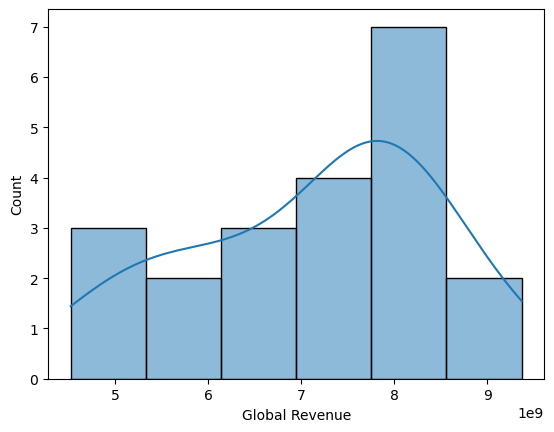

In [10]:
#histogram of global revenue values to check skew, if distribution is looking normal
sns.histplot(data=df, x = "Global Revenue", kde=True)

C:\Users\Nick\AppData\Local\Temp\ipykernel_2180\1270745083.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


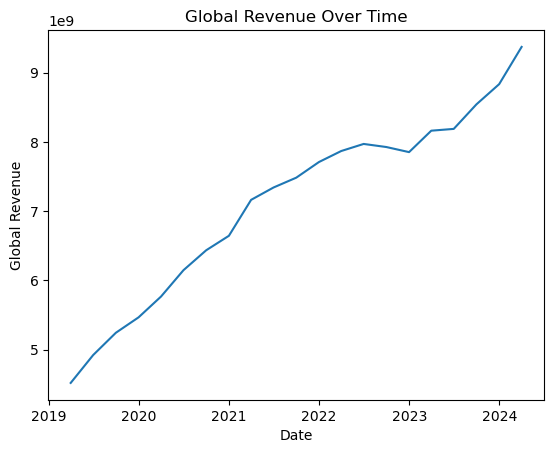

In [11]:
#Lets see the trend of global revenue over time
df["Date"] = pd.to_datetime(df["Date"])
sns.lineplot(data=df, x="Date", y="Global Revenue")
plt.title("Global Revenue Over Time")
plt.show()

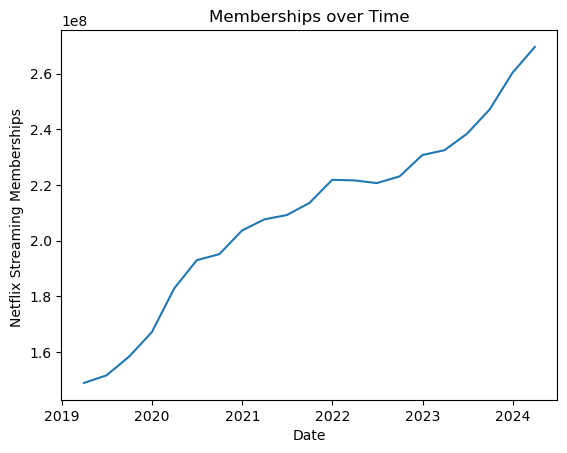

In [12]:
#Global memberships over time
df["Date"] = pd.to_datetime(df["Date"])
sns.lineplot(data=df, x="Date", y="Netflix Streaming Memberships ")
plt.title("Memberships over Time")
plt.show()

# VISUALS BY EACH REGION SECTION

### REVENUE BY REGION


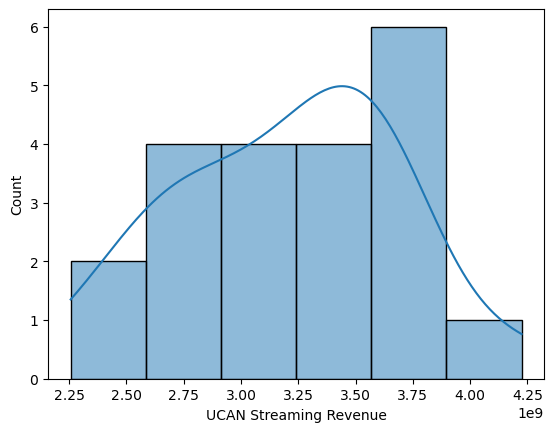

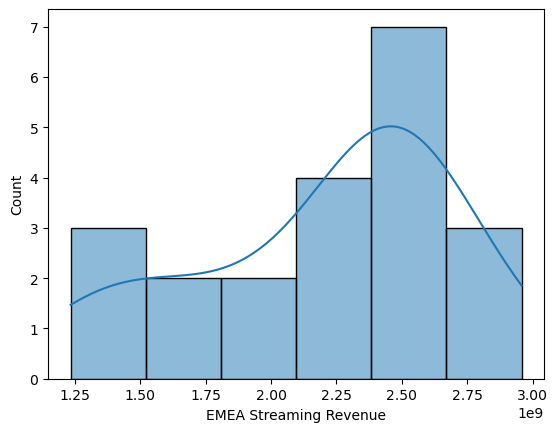

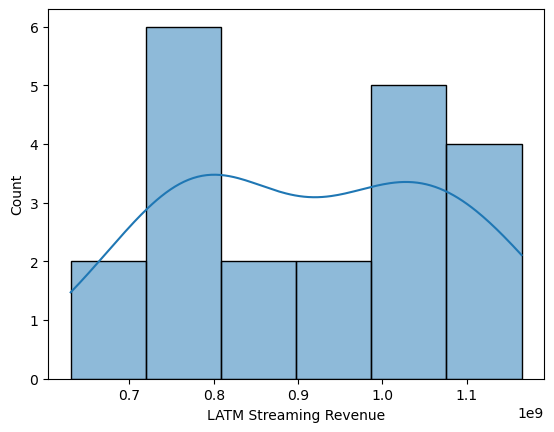

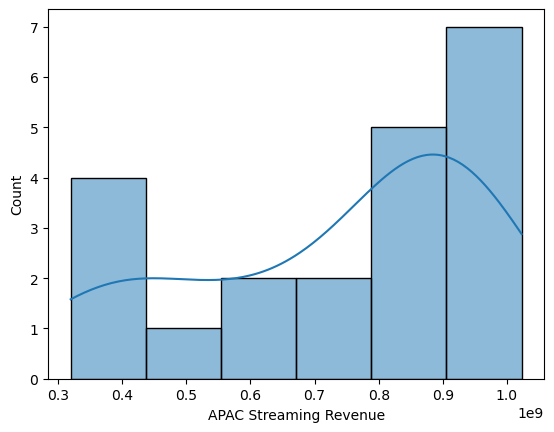

In [15]:
#make histogram for each regions revenue 
columns_rev = ['UCAN Streaming Revenue', 'EMEA Streaming Revenue', 'LATM Streaming Revenue', 'APAC Streaming Revenue']
for i in columns_rev:
    plt.figure()
    sns.histplot(df[i], kde=True)

## MEMBERS BY REGION


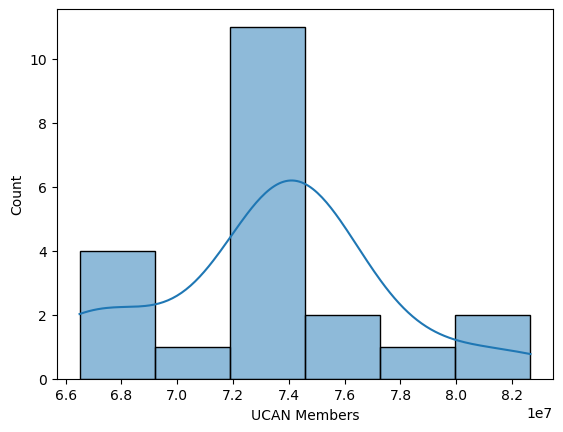

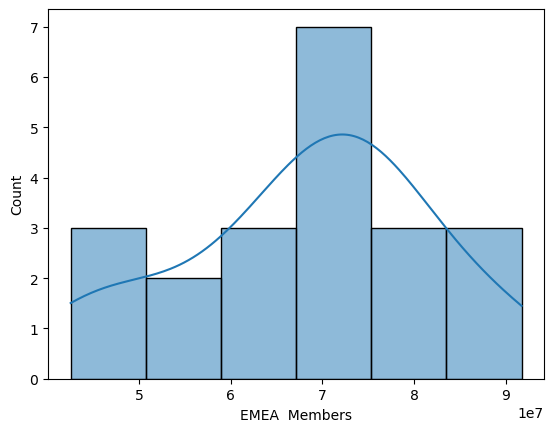

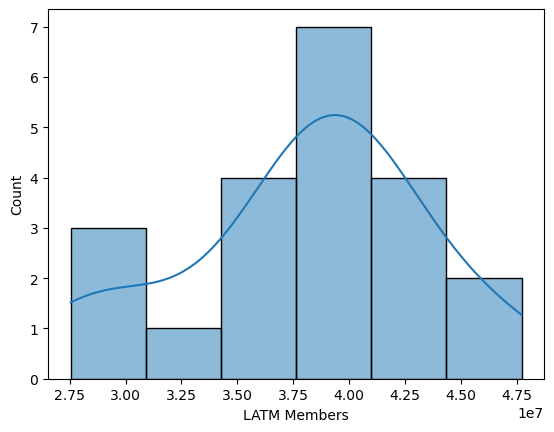

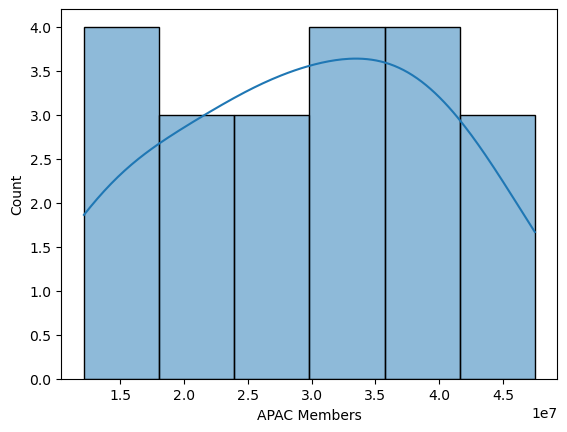

In [17]:
columns_members = ['UCAN Members', 'EMEA  Members', 'LATM Members', 'APAC Members']
for i in columns_members:
    plt.figure()
    sns.histplot(df[i], kde=True, bins=6)

## AVERAGE REVENUE PER USER

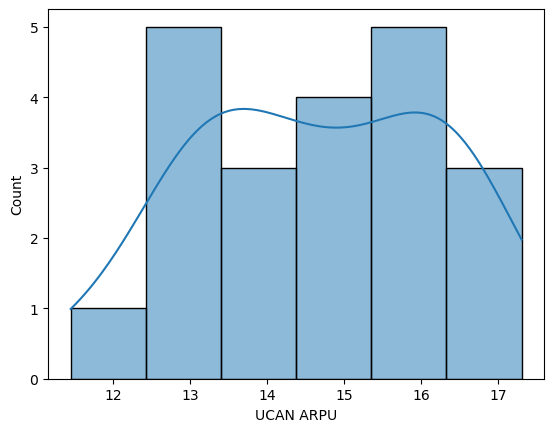

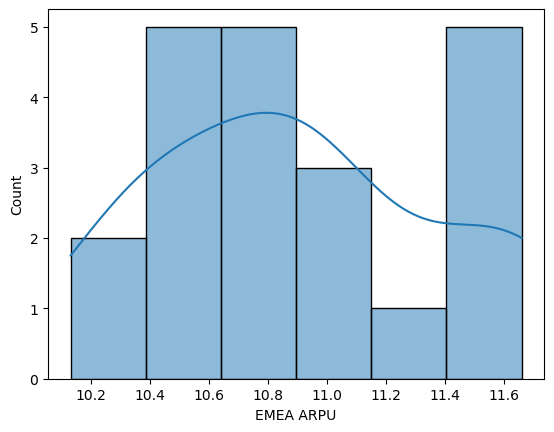

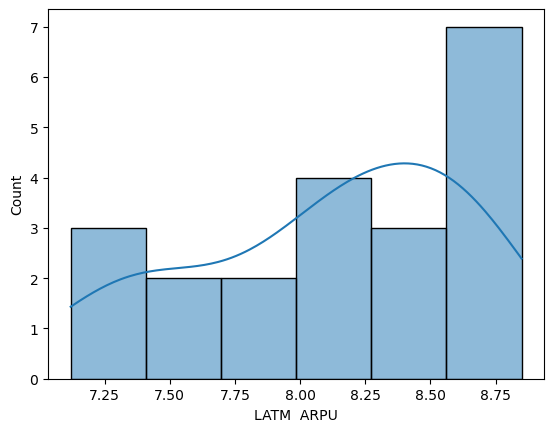

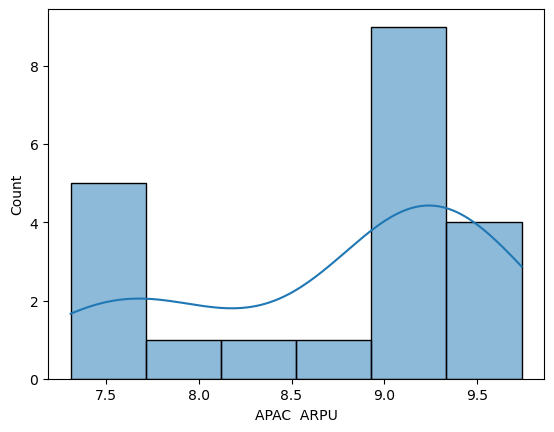

In [19]:
columns_arpu = ['UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU', 'APAC  ARPU']
for i in columns_arpu:
    plt.figure()
    sns.histplot(df[i], kde=True)

## SCATTER PLOTS OVER TIME

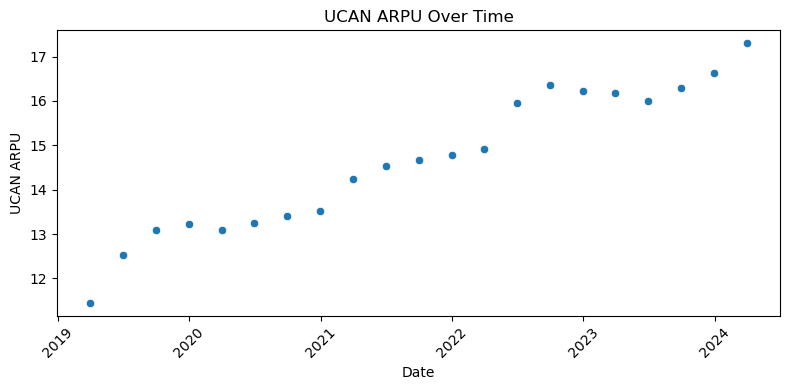

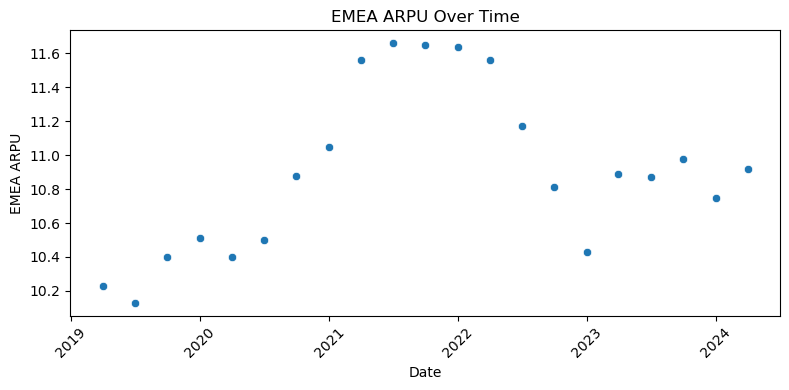

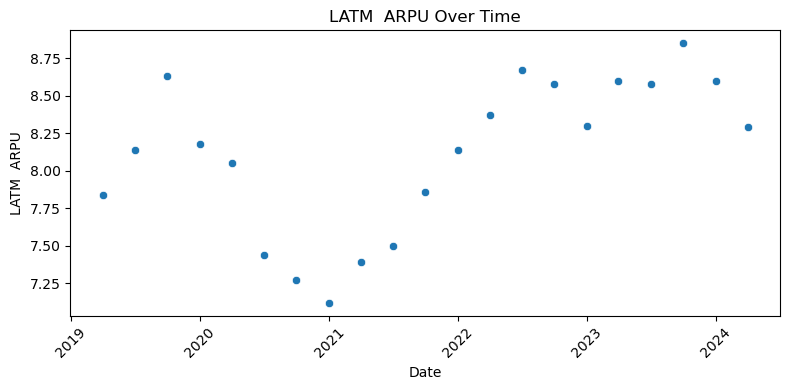

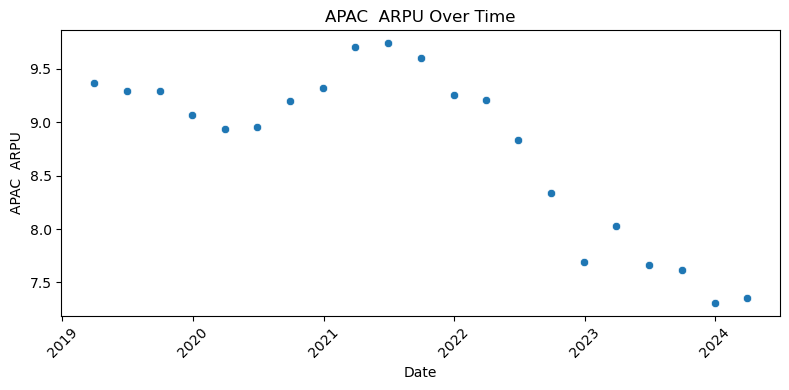

In [21]:
#Want to see relationship between ARPU and time.
columns_arpu2 = ['UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU', 'APAC  ARPU']
for col in columns_arpu2:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x="Date", y=col)
    plt.title(f"{col} Over Time")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

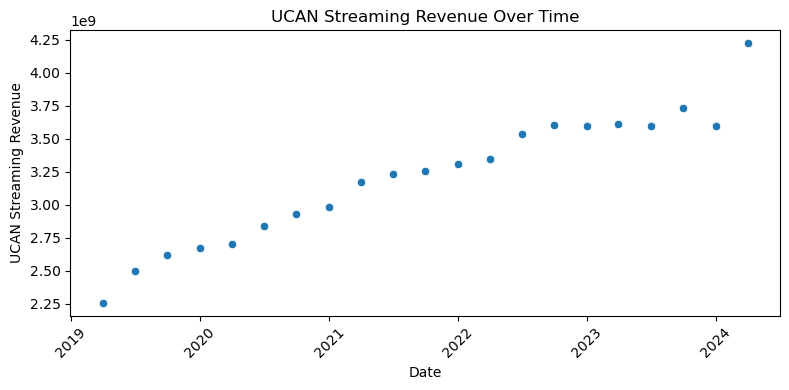

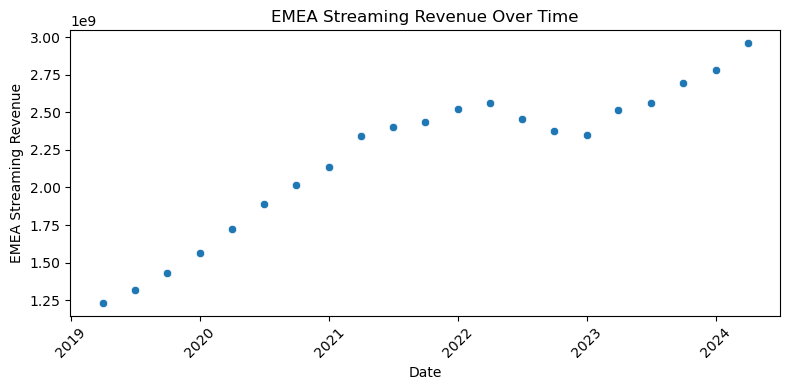

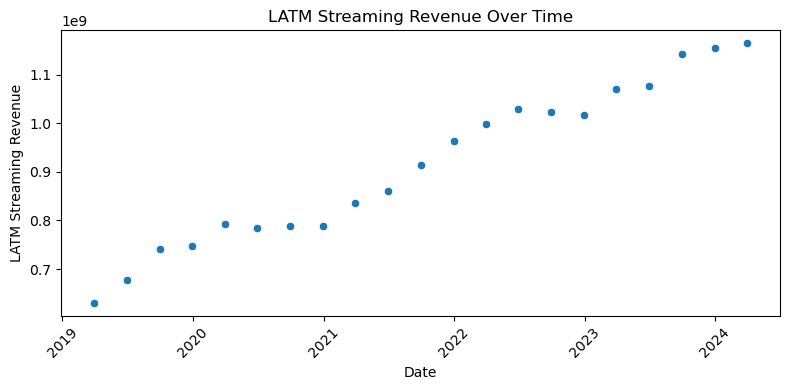

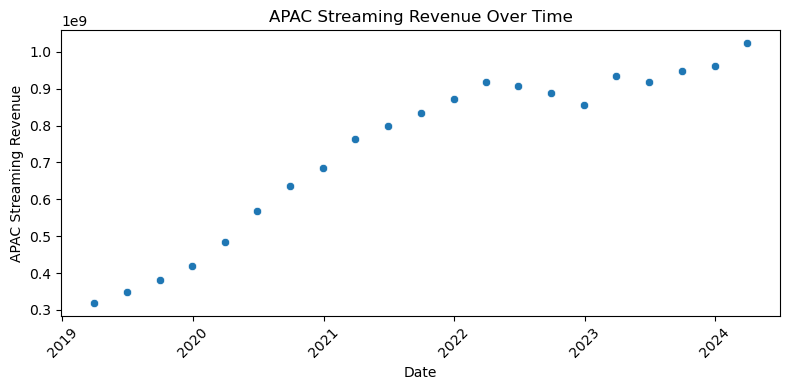

In [22]:
columns_revtime = ['UCAN Streaming Revenue', 'EMEA Streaming Revenue', 'LATM Streaming Revenue', 'APAC Streaming Revenue']
for col in columns_revtime:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x="Date", y=col)
    plt.title(f"{col} Over Time")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

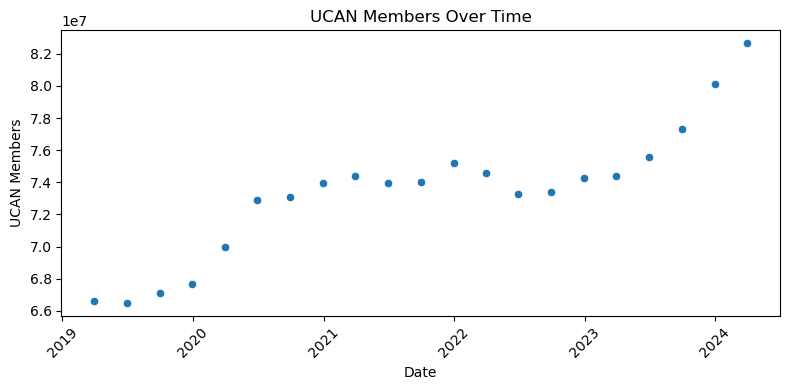

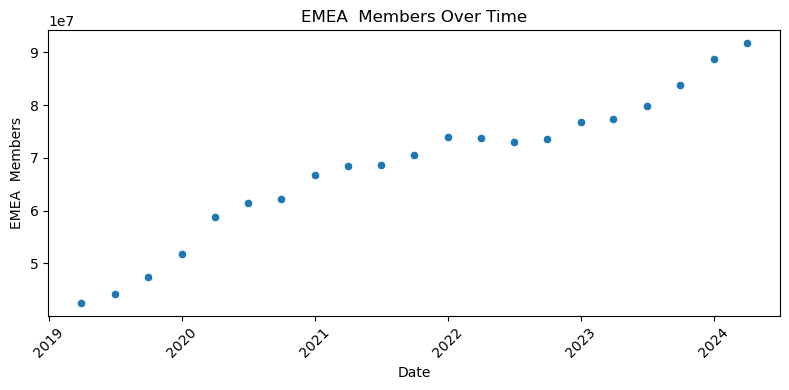

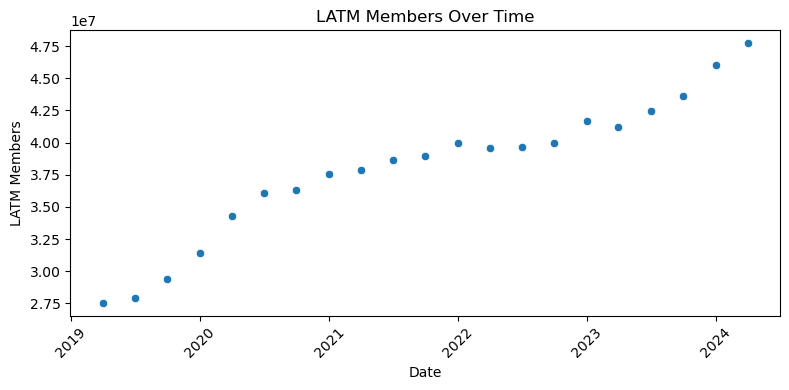

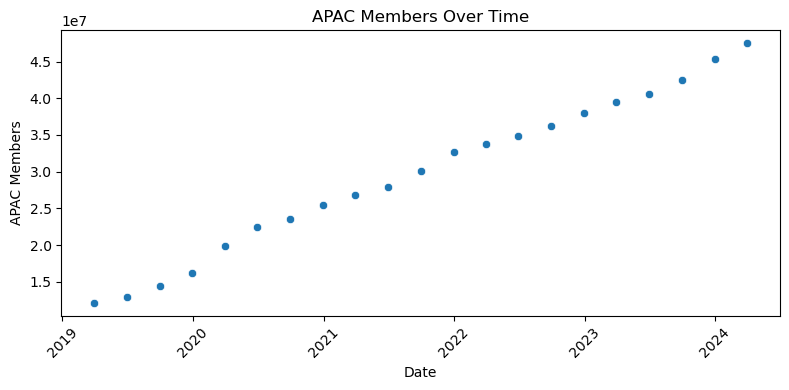

In [23]:
columns_membertime = ['UCAN Members', 'EMEA  Members', 'LATM Members', 'APAC Members']
for col in columns_membertime:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x="Date", y=col)
    plt.title(f"{col} Over Time")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Thoughts so far:
    seems illogical for ARPU over time to significantly decrease in APAC region yet membership count and revenue has increased exponentially. Need to investigate further. Hypothesis: Netflix lowered subscription costs in APAC region which lead to a large jump in subscribers, thus increasing revenue while lowering ARPU. Potential strategy to try in other regions.

## NOW THAT WE HAVE SOME GOOD VISUALIZATIONS OF OUR DATA, LETS SEE IF WE MISSED ANY OUTLIERS FROM OUR VISUALS

In [26]:
#Function to test for outliers using IQR method
def check_outliers(df, multiplier=1.5):
    outlier_summary = []

    numeric_cols = df.select_dtypes(include="number").columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]

        outlier_summary.append({
            "Column": col,
            "IQR": round(IQR, 2),
            "Lower Bound": round(lower, 2),
            "Upper Bound": round(upper, 2),
            "Outlier Count": len(outliers)
        })

    return pd.DataFrame(outlier_summary)


In [27]:
check_outliers(df)

,Column,IQR,Lower Bound,Upper Bound,Outlier Count
0,Global Revenue,1.821855e+09,3.415504e+09,1.070292e+10,0
1,UCAN Streaming Revenue,7.551210e+08,1.706988e+09,4.727472e+09,0
2,EMEA Streaming Revenue,6.308890e+08,9.462035e+08,3.469760e+09,0
3,LATM Streaming Revenue,2.417120e+08,4.259540e+08,1.392802e+09,0
4,APAC Streaming Revenue,3.476140e+08,4.771900e+07,1.438175e+09,0
5,UCAN Members,1.675000e+06,7.039150e+07,7.709150e+07,8
6,EMEA Members,1.524600e+07,3.861400e+07,9.959800e+07,0
7,LATM Members,5.181000e+06,2.829650e+07,4.902050e+07,2
8,APAC Members,1.553100e+07,-8.045000e+05,6.131950e+07,0
9,UCAN ARPU,2.930000e+00,8.860000e+00,2.058000e+01,0


In [28]:
def get_outliers(df, column, multiplier=1.5):
    """
    Returns a DataFrame with only the outlier rows for a given numeric column.
    Uses the IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR

    # Filter and return only the outliers
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

In [29]:
get_outliers(df, "UCAN Members")

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,2019-03-31,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,2019-06-30,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,2019-09-30,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,2019-12-31,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,2020-03-31,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000
18,2023-09-30,8541668000,3735133000,2693146000,1142811000,948216000,77321000,83760000,43645000,42427000,16.29,10.98,8.85,7.62,247153000
19,2023-12-31,8832825000,3594791000,2783530000,1156023000,962715000,80128000,88813000,45997000,45338000,16.64,10.75,8.60,7.31,260276000
20,2024-03-31,9370440000,4224315000,2958153000,1165008000,1022924000,82658000,91729000,47720000,47495000,17.30,10.92,8.29,7.35,269602000


In [30]:
get_outliers(df, "LATM Members")

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,2019-03-31,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,2019-06-30,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000


### Conclusion: outliers are likely not mistakes and just dips or jumps in member count.

## prepare csv file for exportation to postgreadmin

In [56]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [60]:
df = df.rename(columns={
    "emea__members": "emea_members",
    "latm__arpu": "latm_arpu",
    "apac__arpu": "apac_arpu"
})

In [62]:
df.head()

,date,global_revenue,ucan_streaming_revenue,emea_streaming_revenue,latm_streaming_revenue,apac_streaming_revenue,ucan_members,emea_members,latm_members,apac_members,ucan_arpu,emea_arpu,latm_arpu,apac_arpu,netflix_streaming_memberships
0,2019-03-31,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,2019-06-30,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,2019-09-30,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,2019-12-31,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,2020-03-31,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


In [64]:
df.to_csv("cleaned_file.csv", index=False)